In [3]:
import pandas as pd
import seaborn as sns

# Simple Linear Regression

In [4]:
# Read dataset
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
#rename columns
column_names = { 'X1' : 'Relative_Compactness' , 'X2' : 'Surface_Area' ,
'X3' : 'Wall_Area' , 'X4' : 'Roof_Area' , 'X5' : 'Overall_Height' ,
'X6' : 'Orientation' , 'X7' : 'Glazing_Area' ,
'X8' : 'Glazing_Area_Distribution' ,
'Y1' : 'Heating_Load' , 'Y2' : 'Cooling_Load' }

In [6]:
df.rename(columns=column_names, inplace= True)

In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# Select samples from data
simpleReg = df[['Relative_Compactness','Cooling_Load']].sample(15, random_state= 2)
simpleReg.head()

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59


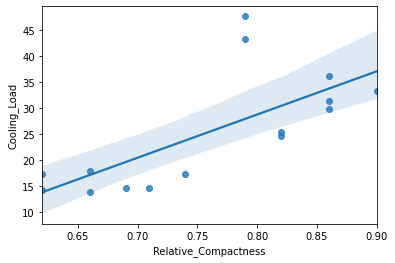

In [9]:
# Plot Linear Reg with seaborn
sns.regplot(x= 'Relative_Compactness', y= 'Cooling_Load',
           data = simpleReg);

In [11]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 	#prints 0.063

0.063

In [12]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.894

In [13]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

In [14]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089